# Smoothing

Smoothing, or blurring, is usually one the first step of your image processing pipeline. 

There are many reasons for smoothing, but the main one is surely reducing noise, or so-called artefacts that get in the way of your region of interest.

This recipe focus on blurring in the context of drawing edges, so after applying different blur processing on the image, we will see what the impact is on the drawn edges, using a simple canny function call.

In [2]:
(ns balmy-leaves
 (:require
  [opencv4.core :refer :all]
  [opencv4.utils :as u]))

nil

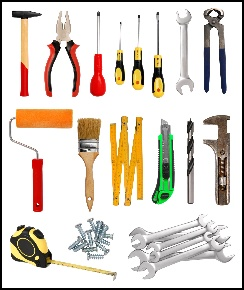

In [3]:
(def neko (-> "resources/tools/set4.jpg" imread (u/resize-by 0.2)     
              (copy-make-border! 2 2 2 2 BORDER_CONSTANT (new-scalar 0 0 0))))

(u/>>> neko)

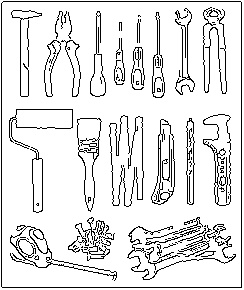

In [4]:
(->
  neko
  (clone)
  (cvt-color! COLOR_RGB2GRAY)
  (canny! 300.0 100.0 3 true)
  (bitwise-not!)
  (u/>>>)  )

We will use a simple annotate function to mark the image with the factor used to generate images.

In [5]:
(defn annotate![mat text]
 (put-text mat
  text (new-point 20 20) FONT_HERSHEY_PLAIN 1 (new-scalar 0 0 0) 1)
 mat)

#'balmy-leaves/annotate!

## Median Filter 

The median filter run through each element of the signal (in this case the image) and replace each pixel with the median of its neighboring pixels (located in a square neighborhood around the evaluated pixel).


In [6]:
(map  
#(-> neko 
     (clone)  
     (median-blur! %)
     (annotate! (str "blur " %)) 
     (u/>>>))
(filter odd? (range 3 25)))

(#object[java.awt.image.BufferedImage 0x6ad93c78 "BufferedImage@6ad93c78: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x37f407de "BufferedImage@37f407de: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x47a8bf63 "BufferedImage@47a8bf63: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x4fb

In [7]:
(map  
#(-> neko 
     (clone)  
     (median-blur! %)
     (cvt-color! COLOR_RGB2GRAY)
     (canny! 300.0 100.0 3 true)
     (bitwise-not!)
     (u/>>>))
(filter odd? (range 3 15)))

(#object[java.awt.image.BufferedImage 0x6343ea14 "BufferedImage@6343ea14: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x7ed60bf2 "BufferedImage@7ed60bf2: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x51dcaae3 "BufferedImage@51dcaae3: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x2a2

So while the blur effect looks really nice on the picture itself, the edges are actually disappearing and 

## Normalized box filter

This filter is the simplest of all! Each output pixel is the mean of its kernel neighbors ( all of them contribute with equal weights)

In [8]:
(map  
  #(-> neko 
       (clone)
       (blur! (new-size % %) (new-point -1 -1)) 
       (annotate! (str "blur " %)) 
       (u/>>>))
  (take-nth 2 (filter odd? (range 0 20))))

(#object[java.awt.image.BufferedImage 0x29c0de4a "BufferedImage@29c0de4a: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x47939411 "BufferedImage@47939411: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x29e2f3fd "BufferedImage@29e2f3fd: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x213

In [9]:
(map  
  
  #(-> neko 
       (clone) 
       (blur! (new-size % %) (new-point -1 -1)) 
       (cvt-color! COLOR_RGB2GRAY)
       (canny! 200.0 100.0 3 true)
       (bitwise-not!)
       (u/>>>))
  
  (filter odd? (range 0 9)))

(#object[java.awt.image.BufferedImage 0x43c94a36 "BufferedImage@43c94a36: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x13a23fe6 "BufferedImage@13a23fe6: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x540434fc "BufferedImage@540434fc: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x3be

## Gaussian Blur

Probably the most useful filter (although not the fastest). Gaussian filtering is done by convolving each point in the input array with a Gaussian kernel and then summing them all to produce the output array.


In [10]:
(map  
  #(-> neko 
       (clone)
       (gaussian-blur! (new-size % %) 10) 
       (annotate! (str "gaussian " %))
       u/>>>)
  (take-nth 2 (filter odd? (range 0 20))))

(#object[java.awt.image.BufferedImage 0x783186d2 "BufferedImage@783186d2: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x5f09aa56 "BufferedImage@5f09aa56: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x62a01336 "BufferedImage@62a01336: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x72d

In [11]:
(map  
  #(-> neko 
       (clone)
       (gaussian-blur! (new-size % %) 10) 
       (cvt-color! COLOR_RGB2GRAY)
       (canny! 200.0 100.0 3 true)
       (bitwise-not!)
       (u/>>>))
  (filter odd? (range 0 9)))

(#object[java.awt.image.BufferedImage 0x420849e7 "BufferedImage@420849e7: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x7b05a04f "BufferedImage@7b05a04f: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x39c61434 "BufferedImage@39c61434: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0xace

The one before last picture presents keeps the most important features and should be easy to analyse. Most of the time you would actually use a gaussian-blur.

## Bilateral Filter

So far, we have explained some filters which main goal is to smooth an input image. However, sometimes the filters do not only dissolve the noise, but also smooth away the edges. 

To avoid this (at certain extent at least), we can use a bilateral filter.
In an analogous way as the Gaussian filter, the bilateral filter also considers the neighboring pixels with weights assigned to each of them. 

These weights have two components, the first of which is the same weighting used by the Gaussian filter. The second component takes into account the difference in intensity between the neighboring pixels and the evaluated one.

In [12]:
(map  
  #(-> neko 
       (clone)
       (bilateral-filter! 10 (* 2 %) (/ % 2))
       (annotate! (str "bi- filter " %)) 
       (u/>>>))
  (take-nth 40 (range 20 201)))


(#object[java.awt.image.BufferedImage 0x42d0b3de "BufferedImage@42d0b3de: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x26678653 "BufferedImage@26678653: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x24d4a43c "BufferedImage@24d4a43c: type = 5 ColorModel: #pixelBits = 24 numComponents = 3 color space = java.awt.color.ICC_ColorSpace@2dd7ae0e transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 3 dataOff[0] = 2"] #object[java.awt.image.BufferedImage 0x4e1

In [13]:
(map  
  
  #(-> neko 
    (clone)
    (bilateral-filter! 10 (* 2 %) (/ % 2))
    (cvt-color! COLOR_RGB2GRAY)
    (canny! 200.0 100.0 3 true)
    (bitwise-not!)
    (u/>>>))

  (take-nth 40 (range 20 200)))

(#object[java.awt.image.BufferedImage 0x5fc9c634 "BufferedImage@5fc9c634: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x493763f0 "BufferedImage@493763f0: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x58bf2fa8 "BufferedImage@58bf2fa8: type = 10 ColorModel: #pixelBits = 8 numComponents = 1 color space = java.awt.color.ICC_ColorSpace@5c3611ce transparency = 1 has alpha = false isAlphaPre = false ByteInterleavedRaster: width = 244 height = 290 #numDataElements 1 dataOff[0] = 0"] #object[java.awt.image.BufferedImage 0x693

The last picture in the series, shows a set of tools that are much easier to identify and so should be a good start for analyzing the content of the picture.

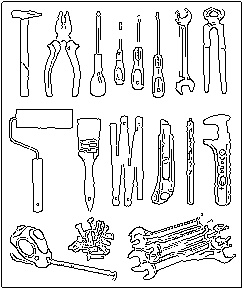

In [14]:
(def best
  (-> neko 
    (clone)
    (bilateral-filter! 10 (* 2 20) (/ 20 2))
    (cvt-color! COLOR_RGB2GRAY)
    (canny! 200.0 100.0 3 true)
    (bitwise-not!)))

(u/>>> best)

In [15]:
(def contours (new-arraylist))
(find-contours best contours (new-mat) RETR_LIST CHAIN_APPROX_TC89_KCOS)
(def )

CompilerException java.lang.RuntimeException: Too few arguments to def, compiling:(/tmp/form-init819752201373962961.clj:3:1) 


class clojure.lang.Compiler$CompilerException: 

In [16]:
(defn draw-contours-with-line! [img contours]
(dotimes [i (.size contours)]
   (let [c (.get contours i)
      m2f (new-matofpoint2f (.toArray c))
      len (arc-length m2f true)
      ret (new-matofpoint2f)
      approx (approx-poly-dp m2f ret (* 0.1 len) true)
      nb-sides (.size (.toList ret))]
;(spit "test.log" (str ">" nb-sides) :append true)
(draw-contours img contours i
 (condp = nb-sides
  11  (new-scalar 56.09 68.05 66.27)
  6  (new-scalar 356.09 51.57 43.73)
  4  (new-scalar 26.09 51.57 43.73)
  13  (new-scalar 146.09 51.57 43.73)
  5  (new-scalar 266.09 51.57 43.73)
  8 (new-scalar 236.09 51.57 43.73)
  16 (new-scalar 206.09 68.05 66.27)
  21 (new-scalar 0 0 255)
     (new-scalar 127 50 0))
  1)))
 img)

#'balmy-leaves/draw-contours-with-line!

1173


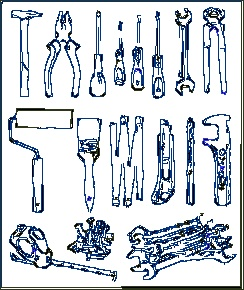

In [17]:
(def output (-> best clone  (cvt-color! COLOR_GRAY2RGB)))
(println (count contours))
(draw-contours-with-line! output contours)

(u/>>> output)